# Hochschule Bonn-Rhein-Sieg

# Mathematics for Robotics and Control, WS18

# Assignment 1 - Frames

This week's assignment is about frames of reference. As you have learned in the lecture, the concept of frames is of great importance in robotics.

Let us consider a mobile robot (e.g. a youBot) that delivers packages in a lab. The robot is equipped with several sensors, including a camera for perceiving its environment and a gripper for grasping objects. You will use your knowledge of frames to help our robot complete its tasks.

Let us first setup this notebook so that figures and plots can be shown in the notebook page. Once you run the following cell, you don't have to import any of the packages in the subsequent code cells, as they will be available to all of them.

In [1]:
import numpy as np
import numpy.linalg as linalg
import matplotlib.pyplot as plt

from IPython.core.pylabtools import figsize, getfigs

**Hint**: You might want to check the the NumPy manual [1] before you start. In particular, read and understand the following functions:

```
array()
asarray()
sin()
cos()
tan()
radians()
hstack()
vstack()
dot()
delete()
linalg.inv()
linalg.det()
```

[1] http://docs.scipy.org/doc/numpy/genindex.html

## Picking up a package for the lab [50 points]

The robot's task for today is to go to the reception and pick up a package that is lying on a cabinet. To do so, the robot has to complete a few subtasks.

### Locate the pose of the reception's door relative to the robot's base frame [25 points]

Assume that our robot is located in a hallway that leads to the reception. In order to go inside the reception, the robot needs to know the pose of the door $\{D\}$ relative to the base frame $\{B \}$, i.e. we need the transform ${}^{B}_DT$; however, we are given the pose of the door relative to the camera's frame $\{C\}$, as we are using a camera for detecting the reception's door.

With respect to the camera, the door frame $\{D\}$ is rotated $-13.215^o$ about $Z$ and $-28.647^o$ about $Y$ (this a rotation about $Z$ first, followed by a rotation in $Y$  using the *Z-Y-X*-Euler-angle convention) and has a relative translation of $(1.533, -0.354, 0.197)$ meters in $X,Y$, and $Z$ respectively. We also know the pose of the camera relative to the base, $^{B}_CT$: $\{C\}$ is located $(-0.176, 0.035, 0.563)$ meters away from the base frame and is rotated $28.647^o$ about $\{B\}$'s $Y$ axis.

Observe the following figure for a visual description of the frames. The $X$ axis is represented by the red line, the $Y$ axis by the green line, and the $Z$ axis by the blue line.

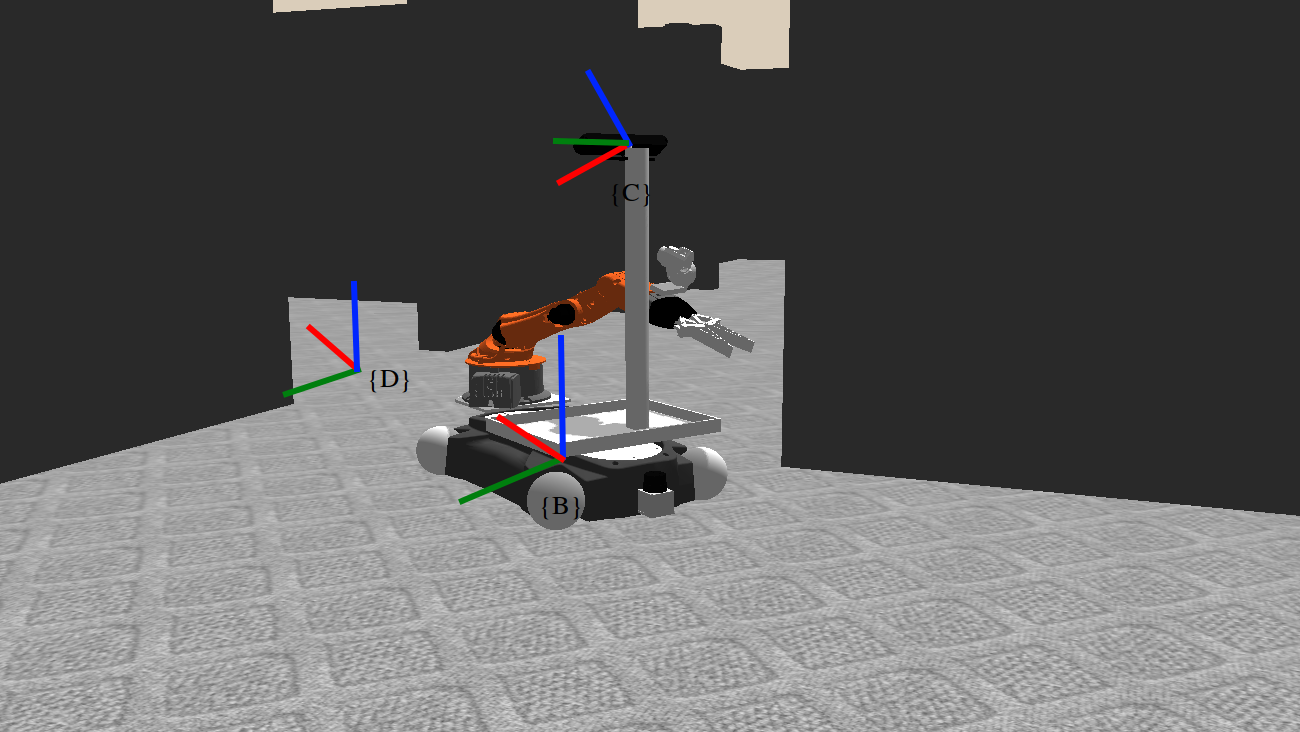

In [3]:
import IPython
IPython.core.display.Image("images/youbot_and_door.png", embed=True)

Calculate $^{B}_DT$ by completing the following function.

In [14]:
def direct_transform():
    '''Returns a homogenous transformation describing
    the pose of frame {D} relative to frame {B}.

    '''
    ### BEGIN SOLUTION
    # raise NotImplementedError()
    
    #to calculate individual rotation matrices(reusable)
    def Rz(theta):
             R_z=np.array([[np.cos(theta),-np.sin(theta),0],[np.sin(theta),np.cos(theta),0],[0,0,1]])
             return R_z
    def Ry(theta):
             R_y=np.array([[np.cos(theta),0,np.sin(theta)],[0,1,0],[-np.sin(theta),0,np.cos(theta)]])
             return R_y
            
    Rot_matrix_1=np.dot(Rz(np.deg2rad(-13.215)),Ry(np.deg2rad(-28.647))) #2 successive transformation R(Z)*R(Y)
    
    
    Rot_matrix_2=Ry(np.deg2rad(28.647))
    
    
    Translation_matrix_1=np.array([[1.533],[-0.354],[0.197]])
    
    Translation_matrix_2=np.array([[-0.176],[0.035],[0.563]])
    
    homo_mat=np.array([[0,0,0,1]])
    
    D_C_T=np.vstack((np.hstack((Rot_matrix_1,Translation_matrix_1)),homo_mat))
    
    C_B_T=np.vstack((np.hstack((Rot_matrix_2,Translation_matrix_2)),homo_mat))
    
    
   
    
    
    return(np.dot(C_B_T,D_C_T),C_B_T) #returned C_B_T because we need it in 2nd sol
    
    ### END SOLUTION

D_B_T ,C_B_T= direct_transform()
print("Transformation from D to B")
print(D_B_T)


Transformation from D to B
[[ 9.79605349e-01  2.00622117e-01  1.11412376e-02  1.26378963e+00]
 [-2.00622117e-01  9.73519087e-01  1.09596317e-01 -3.19000000e-01]
 [ 1.11412376e-02 -1.09596317e-01  9.93913739e-01  9.46772698e-04]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  1.00000000e+00]]


### Reaching for a package [25 points]

Once the robot has successfully entered the reception and approached the cabinet where the package is, it uses an object detection and recognition module for finding the package relative to the camera frame $\{C \}$. The module reports that, relative to frame $\{C\}$, the package is located at $(1.124, -0.060, 0.473)$ meters in $X, Y$, and $Z$, respectively, and is rotated by $-28.647^o$ about $Y$. This information corresponds to the transform ${}^C_PT$.

From the previous subtask, we know the location of the camera relative to the robot's base (given by ${}^B_CT$). Furthermore, using the robot's kinematics, we can calculate ${}^B_ET$, the transform describing the frame of the manipulator's end-effector $\{E\}$ relative to the base frame $\{B\}$; this is given by a translation of $(0.679, -0.019, 0.445)$ meters in $X, Y$, and $Z$ respectively and a rotation of $90^o$ about $Y$.

For picking up this package, the robot needs to know the package's position and orientation with respect to its end-effector. Your task is to calculate the pose of the package relative to the manipulator's end-effector, namely compute ${}^E_PT$. The following figure shows a description of the frames involved.

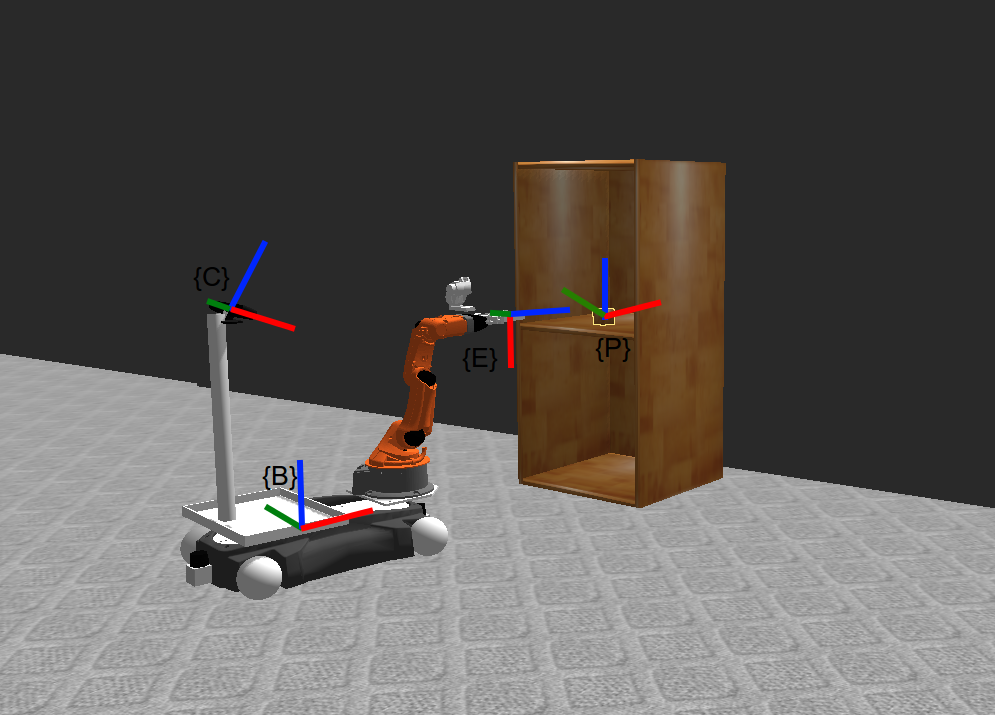

In [5]:
IPython.core.display.Image("images/youbot_and_package.png", embed=True)

Calculate $^{E}_PT$ by completing the following function.

In [15]:
def inverse_transform(C_B_T):
    '''Returns a homogenous transformation describing
    the pose of frame {P} relative to frame {E}.

    '''
    ### BEGIN SOLUTION
    #raise NotImplementedError()

    #to calculate individual rotation matrices(reusable)
    
    def Ry(theta):
             R_y=np.array([[np.cos(theta),0,np.sin(theta)],[0,1,0],[-np.sin(theta),0,np.cos(theta)]])
             return R_y
            
    Rot_matrix_1=Ry(np.deg2rad(-28.647)) #2 successive transformation R(Z)*R(Y)
    
    
    Rot_matrix_2=Ry(np.deg2rad(90))
    
    
    Translation_matrix_1=np.array([[1.124],[-0.060],[0.473]])
    
    Translation_matrix_2=np.array([[0.679],[-0.019],[0.445]])
    
    homo_mat=np.array([[0,0,0,1]])
    
    E_B_T=np.vstack((np.hstack((Rot_matrix_2.transpose(),-np.dot(Rot_matrix_2.transpose(),Translation_matrix_2))),homo_mat))
    #created inverted transformation in above line
    
    P_C_T=np.vstack((np.hstack((Rot_matrix_1,Translation_matrix_1)),homo_mat))
    
    P_E_T=np.dot(np.dot(E_B_T,C_B_T),P_C_T)
    return P_E_T
    
    ### END SOLUTION

P_E_T = inverse_transform(C_B_T)
print("Transformation from P to E")
print(P_E_T)

Transformation from P to E
[[ 4.37911811e-17  0.00000000e+00 -1.00000000e+00  5.75891405e-03]
 [ 0.00000000e+00  1.00000000e+00  0.00000000e+00 -6.00000000e-03]
 [ 1.00000000e+00  0.00000000e+00  6.04360018e-17  3.58173001e-01]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  1.00000000e+00]]


## Gimbal lock [15 points]

One of the problems with using fixed or Euler angles for rotations is the gimbal lock. Before moving on with the assignment, please read about the gimbal lock [here](https://en.wikipedia.org/wiki/Gimbal_lock#Gimbal_lock_in_applied_mathematics) and/or watch a video about it [here](https://www.youtube.com/watch?v=zc8b2Jo7mno).

In the code below, first complete the `rotate` function to rotate a point using fixed-angles and then rotate the point $p$ by two different sets of angles to illustrate the Gimbal lock. Based on what you've learned about the gimbal lock, explain what has happened and why and then describe how this problem can be avoided (Hint: Are there any other representations of rotations other than fixed/Euler angles?).

In [5]:
# You can complete and use these helper functions if you want to
def get_rotation_matrix_z_axis(theta):
    '''Returns a rotation matrix for rotation
    about the Z axis by theta.
    '''
    A_B_R = np.array([[np.cos(theta),-np.sin(theta),0],[np.sin(theta),np.cos(theta),0],[0,0,1]])
    return A_B_R

def get_rotation_matrix_y_axis(theta):
    '''Returns a rotation matrix for rotation
    about the Y axis by theta.
    '''
    A_B_R = np.array([[np.cos(theta),0,np.sin(theta)],[0,1,0],[-np.sin(theta),0,np.cos(theta)]])
    return A_B_R

def get_rotation_matrix_x_axis(theta):
    '''Returns a rotation matrix for rotation
    about the X axis by theta.
    '''
    A_B_R = np.array([[1,0,0],[0,np.cos(theta),-np.sin(theta)],[0,np.sin(theta),np.cos(theta)]])
    return A_B_R


def rotate(p, alpha, beta, gamma):
    '''Rotates the point, p, by 
    gamma (about X), beta (about Y) and alpha (about Z) using fixed angles,
    and returns the rotated point.

    '''
    
    ### BEGIN SOLUTION
    #raise NotImplementedError()
    return (np.dot(np.dot(get_rotation_matrix_z_axis(alpha),get_rotation_matrix_y_axis(beta)),get_rotation_matrix_x_axis(gamma)))
    ### END SOLUTION
    
p = np.array([1., 1., 1.])

#### Specify angles alpha1,... etc. to illustrate the Gimbal lock

### write your code here ###
alpha1 = 0
beta1 = 40
gamma1 = 90
### your code ends here ###

p_a = rotate(p, alpha1, beta1, gamma1)
print(p_a)

### write your code here ###
alpha2 = 40
beta2 = 0
gamma2 = 90
### your code ends here ###

p_b = rotate(p_a, alpha2, beta2, gamma2)
print(p_b)

[[-0.66693806  0.66612868 -0.33386555]
 [ 0.         -0.44807362 -0.89399666]
 [-0.74511316 -0.5962404   0.29883735]]
[[-0.66693806  0.33386555  0.66612868]
 [ 0.74511316  0.29883735  0.5962404 ]
 [ 0.          0.89399666 -0.44807362]]


#### write your explanation here ####

## Properties of a rotation matrix [15 points]

Write down and explain the properties of a rotation matrix below.

#### write the properties of a rotation matrix here  ####

After specifying the mathematical properties of a rotation matrix, complete the following function to determine if a given matrix is a rotation matrix.

In [13]:
def is_rotation_matrix(matrix):
    '''Returns True only if the input matrix is a rotation matrix 
    (based on the properties of a rotation matrix), otherwise it returns False.
    '''
    print matrix
    print matrix.transpose()
    print np.linalg.inv(matrix)
    ### BEGIN SOLUTION
    if np.linalg.inv(matrix)==matrix.transpose():
        return True
    return False
    #raise NotImplementedError()
print(is_rotation_matrix(np.eye(3)))
    ### END SOLUTION

[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]
[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]
[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]


ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

## Read the course rules on LEA for submission details